In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB

In [2]:
data = pd.read_csv("Datasets/lab5.3.csv")
print("The first 5 values of data is :\n", data.head())

The first 5 values of data is :
    Day  Outloook  Temp Humidity    Wind Play Tennis
0    1     Sunny   Hot     High    Weak          No
1    2     Sunny   Hot     High  Strong          No
2    3  Overcast   Hot     High    Weak         Yes
3    4      Rain  Mild     High    Weak         Yes
4    5      Rain  Cool   Normal    Weak         Yes


In [3]:
data = data.apply(LabelEncoder().fit_transform)
data.head()

,Day,Outloook,Temp,Humidity,Wind,Play Tennis
0,0,2,1,0,1,0
1,1,2,1,0,0,0
2,2,0,1,0,1,1
3,3,1,2,0,1,1
4,4,1,0,1,1,1


In [4]:
X = data.iloc[:, :-1]
print("\nThe First 5 values of the train data is\n", X.head())
y = data.iloc[:, -1]
print("\nThe First 5 values of train output is\n", y.head())


The First 5 values of the train data is
    Day  Outloook  Temp  Humidity  Wind
0    0         2     1         0     1
1    1         2     1         0     0
2    2         0     1         0     1
3    3         1     2         0     1
4    4         1     0         1     1

The First 5 values of train output is
 0    0
1    0
2    1
3    1
4    1
Name: Play Tennis, dtype: int32


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [6]:
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
    classification_report
)


In [7]:
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test, average="weighted")
print("Accuracy:", accuracy)
print("F1 Score:", f1)


Accuracy: 0.6666666666666666
F1 Score: 0.5333333333333333


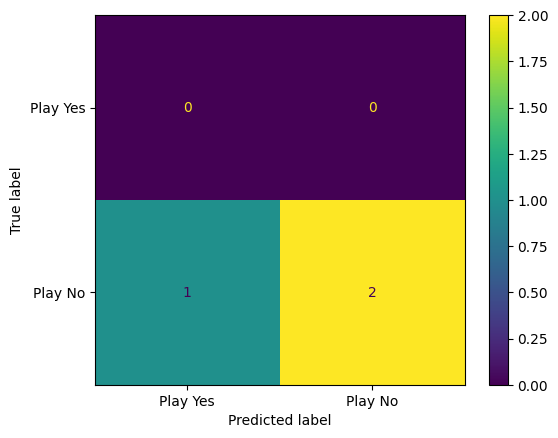

In [8]:
labels = ["Play Yes", "Play No"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot()